# Исследование популярного сервиса аренды самокатов GoFast

В нашем распоряжении данные о некоторых пользователях популярного сервиса аренды самокатов GoFast из нескольких городов, а также об их поездках. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться без подписки и с подпиской Ultra.

**Цель исследования:**
1. Проанализировать исходные данные
2. Проверить некоторые гипотезы, которые могут помочь бизнесу вырасти

**Ход исследования**

Данные для исследования будут получены из трех файлов - пользователи, поездки и подписки. О качестве данных ничего не известно, поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

Необходимо будет проверить данные на ошибки и оценить их влияние на исследование. На этапе предобработки нужно осуществить поиск возможностей исправления всех ошибок данных, которые не приведут к искажению конечного результата. При необходимости, осуществим создание новых столбцов, и приступим к проведению исследовательского анализа.

**Этапы исследования:**

1. Загрузка и обзор данных
2. Предобработка данных
3. Исследовательский анализ
4. Объединение данных
5. Подсчет выручки
6. Проверка гипотез
7. Написание общего вывода

### Загрузка данных

Импортируем необходимые для исследования библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

Откроем файлы с датасетами:

In [2]:
try:
    users_go = pd.read_csv('/datasets/users_go.csv', sep=',')
except:
    users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv', sep=',')

In [3]:
try:
    rides_go = pd.read_csv('/datasets/rides_go.csv', sep=',')
except:
    rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', sep=',')

In [4]:
try:
    subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')
except:
    subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv', sep=',')

Выведем первые строки и общую информацию датасета с пользователями:

In [5]:
users_go.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [6]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Выведем первые строки и общую информацию датасета с поездками:

In [7]:
rides_go.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [8]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Выведем первые строки и общую информацию датасета с подписками:

In [9]:
subscriptions_go.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Пропусков данных в каждом из трех датасетов нет, поэтому можно приступать к предобработке данных.

### Предобработка данных

Приведем столбец `date` в датасете `rides_go` к типу даты pandas:

In [11]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

Убедимся, что тип столбца изменился на `datetime`:

In [12]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


На основе столбца `date` создадим новый столбец с номером месяца:

In [13]:
rides_go['month'] = pd.DatetimeIndex(rides_go['date']).month

Проверим, за какой период данные в датасете. Выведем год и месяцы, в которые были поездки:

In [14]:
sorted(pd.DatetimeIndex(rides_go['date']).year.unique())

[2021]

In [15]:
sorted(rides_go['month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Получается, что мы имеем данные о поездках за все месяцы 2021 года. Судя по всему поездки на самокатах осуществлялись круглый год:

In [16]:
rides_go['month'].value_counts(ascending=False)

month
1     1585
5     1560
6     1553
3     1544
7     1529
12    1527
8     1518
9     1517
4     1506
10    1475
11    1418
2     1336
Name: count, dtype: int64

Убедимся в отстутствии пропусков в каждом из трех датасетов:

In [17]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [18]:
rides_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [19]:
subscriptions_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Проверим наличие дубликатов в датасетах `users_go` и `rides_go` (в датасете `subscriptions_go` дубликатов нет, т.к. он состоит из двух разных строк):

In [20]:
users_go.duplicated().sum()

31

In [21]:
rides_go.duplicated().sum()

0

Удалим дубликаты в датасете `users_go`и убедимся в их отсутствии:

In [22]:
users_go = users_go.drop_duplicates()
users_go.duplicated().sum()

0

В исходных данных не оказалось пропусков, но были проблемы с типом данных в столбце с датой. В базе пользователей были выявлены и удалены дубликаты. Также было определено, что сервисом пользовались круглый год (данные за все месяцы 2021 года).

### Проведение исследовательского анализа данных

Опишем и визуализируем общую информацию о пользователях и поездках.

#### Частота встречаемости городов

Отобразим данные о частоте встречаемости городов в виде столбчатой диаграммы:

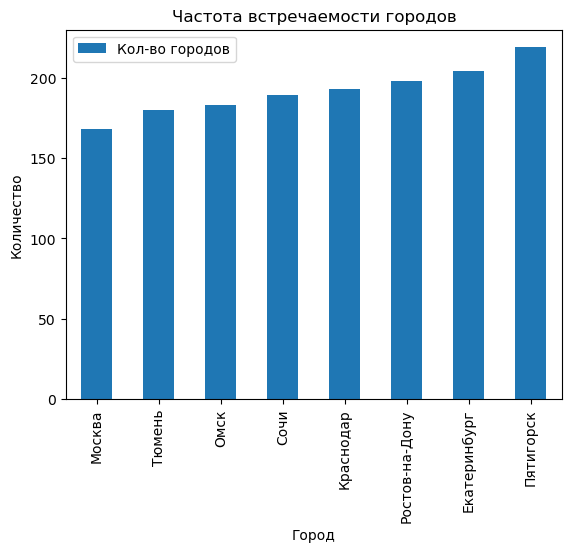

In [23]:
users_go_city_pivot_table = users_go.pivot_table(index='city', values='user_id', aggfunc='count').reset_index()
users_go_city_pivot_table.columns = ['city', 'count']
users_go_city_pivot_table.sort_values(by='count', ascending=True).plot(kind='bar', x='city', y='count', title='Частота встречаемости городов', label='Кол-во городов', xlabel='Город', ylabel='Количество');

Больше всего пользователей в городах Екатеринбург и Пятигорск, меньше всего - в Москве и Омске.

#### Соотношение пользователей с подпиской и без подписки

Отобразим соотношение пользователей с подпиской и без подписки в виде круговой диаграммы:

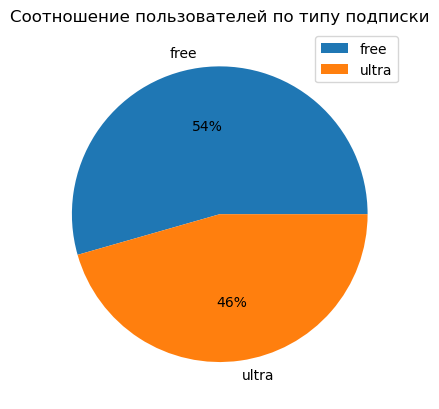

In [24]:
users_go['subscription_type'].value_counts().plot(kind='pie', legend=True, ylabel='', title='Соотношение пользователей по типу подписки', autopct='%1.0f%%');

Больше половины пользователей не используют платную подписку.

#### Возраст пользователей

Отобразим распределение пользователей по возрасту с помощью гистограммы:

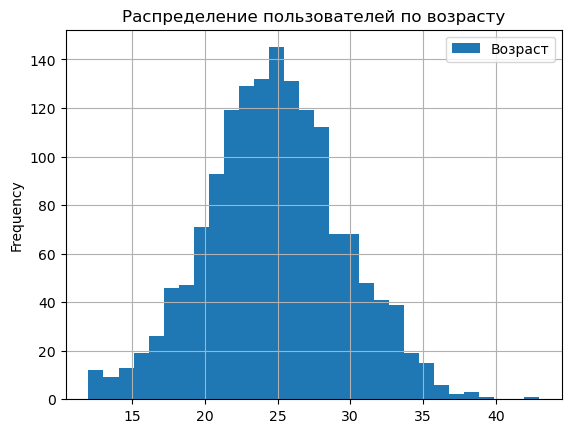

In [25]:
users_go.plot(kind='hist', y='age', bins=30, label='Возраст', grid=True, legend=True, title='Распределение пользователей по возрасту');

Построим диаграмму размаха по данным возраста пользователей:

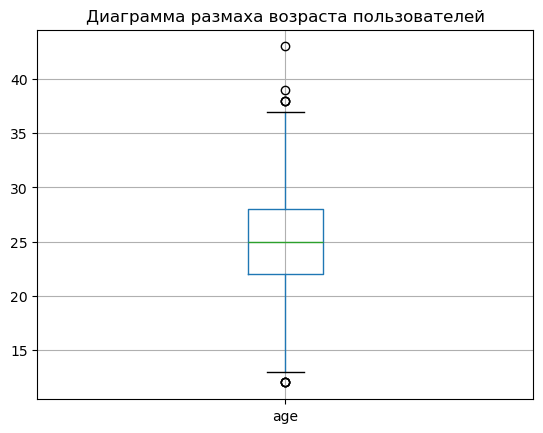

In [26]:
users_go.boxplot(column='age').set_title('Диаграмма размаха возраста пользователей');

Среднестатистический возраст пользователя аренды самокатов GoFast составляет 22-28 лет. В данных есть аномальные значения по возрасту пользователей.

#### Расстояние, которое пользователь преодолел за одну поездку

С помощью гистограммы определим расстояние, которое пользователи преодолевают за одну поездку:

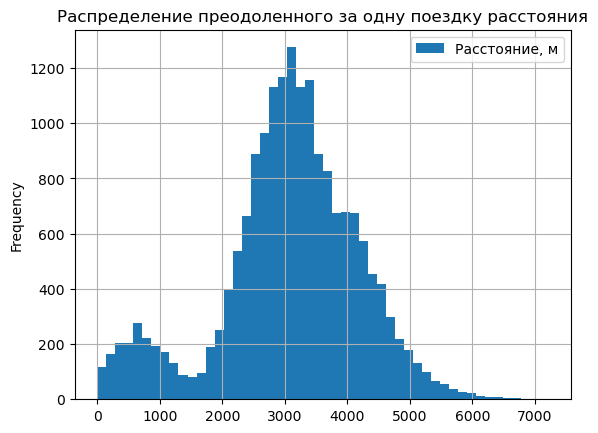

In [27]:
rides_go.plot(kind='hist', y='distance', bins=50, label='Расстояние, м', grid=True, legend=True, title='Распределение преодоленного за одну поездку расстояния');

Построим диаграмму размаха по данным преодоленного расстояния:

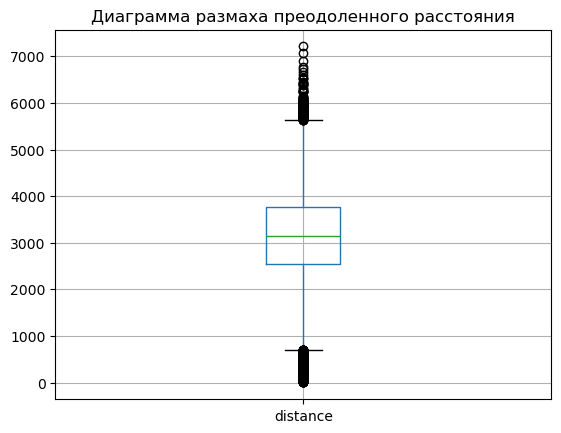

In [28]:
rides_go.boxplot(column='distance').set_title('Диаграмма размаха преодоленного расстояния');

Среднестатистический пользователь аренды самокатов GoFast за одну поездку проезжает 2.5-3.5 км, имеют место также короткие поездки до 1.5 км.

#### Продолжительность поездок

С помощью гистограммы определим продолжительность сессии аренды самоката:

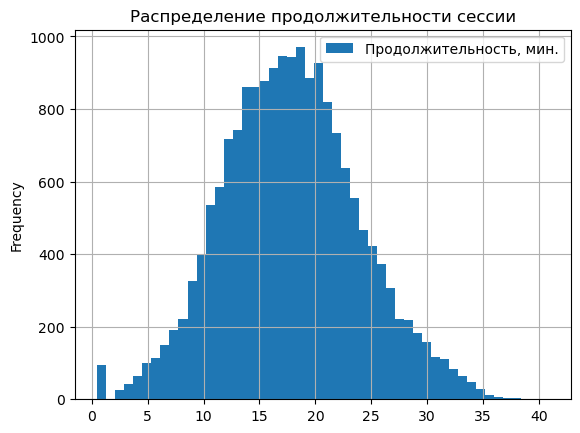

In [29]:
rides_go.plot(kind='hist', y='duration', bins=50, label='Продолжительность, мин.', grid=True, legend=True, title='Распределение продолжительности сессии');

Построим диаграмму размаха по данным продолжительности сессии:

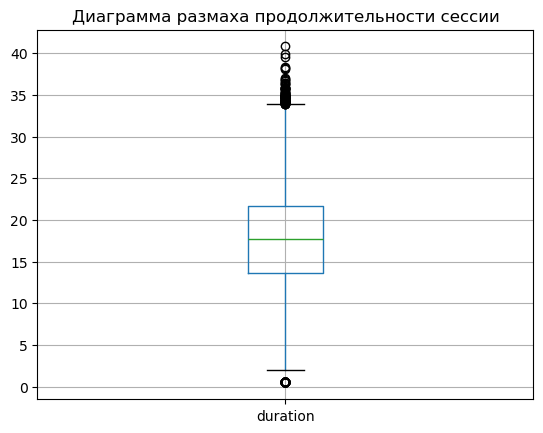

In [30]:
rides_go.boxplot(column='duration').set_title('Диаграмма размаха продолжительности сессии');

Время среднестатистической аренды самокатов GoFast составляет около 13-21 мин.

### Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм:

In [31]:
data = rides_go.merge(users_go, on='user_id', how='left').merge(subscriptions_go, on='subscription_type', how='left')
data.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


Осуществим проверку размерности датасетов. Полученный датасет `data` должен иметь такую же размерность, как у датасета `rides_go` (т.к. именно к нему "прилепляем" данные из других датасетов с помощью `how='left'`):

In [32]:
if rides_go.shape[0] == data.shape[0]:
    print('Размеры датасетов совпадают')
else:
    print('Размеры датасетов не совпадают')

Размеры датасетов совпадают


Из полученного датафрейма создадим еще два.
* С данными о пользователях без подписки:

In [33]:
data_free = data[data['subscription_type'] == 'free']
data_free.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
6505,700,4342.002254,22.368009,2021-02-23,2,Айдар,22,Омск,free,8,50,0
6506,700,3798.334905,18.243756,2021-03-03,3,Айдар,22,Омск,free,8,50,0
6507,700,2984.551206,15.424899,2021-04-09,4,Айдар,22,Омск,free,8,50,0
6508,700,3360.107141,16.765497,2021-06-12,6,Айдар,22,Омск,free,8,50,0
6509,700,2567.543847,11.312160,2021-06-23,6,Айдар,22,Омск,free,8,50,0


* С данными о пользователях с подпиской:

In [34]:
data_ultra = data[data['subscription_type'] == 'ultra']
data_ultra.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


Визуализируем информацию о расстоянии поездок для пользователей обеих категорий:

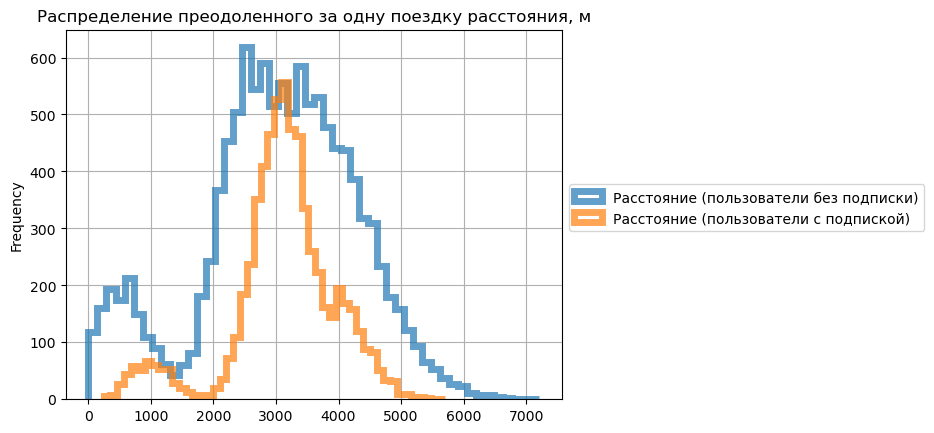

In [35]:
data_free_distance_hist = data_free.plot(kind='hist', histtype='step', linewidth=5, alpha=0.7, y='distance', bins=50, label='Расстояние (пользователи без подписки)', grid=True, legend=True)
data_ultra.plot(kind='hist', ax=data_free_distance_hist, histtype='step', linewidth=5, alpha=0.7, y='distance', bins=50, label='Расстояние (пользователи с подпиской)', grid=True, legend=True, title='Распределение преодоленного за одну поездку расстояния, м')
plt.legend(bbox_to_anchor=(1, 0.6));

И пользователи с подпиской, и без нее, в среднем проезжают одно и то же расстояние - около 3 км. При этом пользователи с подпиской проезжают меньшие расстояния реже, чем пользователи без подписки. Различия в гистограмме обусловлены разным размером датафреймов.

Визуализируем информацию о времени поездок для пользователей обеих категорий:

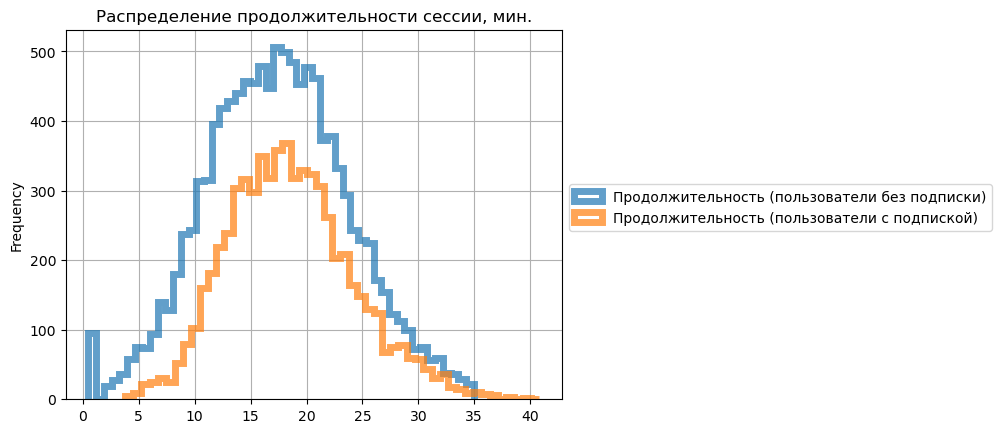

In [36]:
data_free_duration_hist = data_free.plot(kind='hist', histtype='step', linewidth=5, alpha=0.7, y='duration', bins=50, label='Продолжительность (пользователи без подписки)', grid=True, legend=True)
data_ultra.plot(kind='hist', ax=data_free_duration_hist, histtype='step', linewidth=5, alpha=0.7, y='duration', bins=50, label='Продолжительность (пользователи c подпиской)', grid=True, legend=True, title='Распределение продолжительности сессии, мин.')
plt.legend(bbox_to_anchor=(1, 0.6));

И пользователи с подпиской, и без нее, в среднем имеют равную продолжительность сессии - около 18 мин. При этом пользователи с подпиской не имеют непродолжительных сессий (менее 3 минут), в отличие от пользователей без подписки. Различия в гистограмме обусловлены разным размером датафреймов.

### Подсчет выручки

Перед расчетом выручки проверим текущие данные на пропуски:

In [37]:
data.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков нет, поэтому можем работать с данными дальше.

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма `data` с объединенными данными - найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц:

In [38]:
data['duration'] = np.ceil(data['duration'])
data_agg = data.pivot_table(index=['user_id', 'name', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee', 'month'], values=['distance', 'duration'], aggfunc=['sum', 'count']).reset_index()
data_agg.columns = ['user_id', 'name', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee', 'month', 'distance', 'duration', 'count', 'count2']
data_agg = data_agg.drop('count2', axis=1)
data_agg.head(10)

,user_id,name,subscription_type,minute_price,start_ride_price,subscription_fee,month,distance,duration,count
0,1,Кира,ultra,6,0,199,1,7027.511294,42.0,2
1,1,Кира,ultra,6,0,199,4,754.159807,7.0,1
2,1,Кира,ultra,6,0,199,8,6723.470560,46.0,2
3,1,Кира,ultra,6,0,199,10,5809.911100,32.0,2
4,1,Кира,ultra,6,0,199,11,7003.499363,56.0,3
5,1,Кира,ultra,6,0,199,12,6751.629942,28.0,2
6,2,Станислав,ultra,6,0,199,3,10187.723006,63.0,3
7,2,Станислав,ultra,6,0,199,4,6164.381824,40.0,2
8,2,Станислав,ultra,6,0,199,6,3255.338202,14.0,1
9,2,Станислав,ultra,6,0,199,7,6780.722964,48.0,2


В датафрейм `data_agg` добавим столбец с помесячной выручкой, которую принес каждый пользователь:

In [39]:
data_agg['revenue'] = data_agg['start_ride_price'] * data_agg['count'] + data_agg['minute_price'] * data_agg['duration'] + data_agg['subscription_fee']
data_agg = data_agg.drop(['minute_price', 'start_ride_price', 'subscription_fee'], axis=1)
data_agg.head(10)

,user_id,name,subscription_type,month,distance,duration,count,revenue
0,1,Кира,ultra,1,7027.511294,42.0,2,451.0
1,1,Кира,ultra,4,754.159807,7.0,1,241.0
2,1,Кира,ultra,8,6723.470560,46.0,2,475.0
3,1,Кира,ultra,10,5809.911100,32.0,2,391.0
4,1,Кира,ultra,11,7003.499363,56.0,3,535.0
5,1,Кира,ultra,12,6751.629942,28.0,2,367.0
6,2,Станислав,ultra,3,10187.723006,63.0,3,577.0
7,2,Станислав,ultra,4,6164.381824,40.0,2,439.0
8,2,Станислав,ultra,6,3255.338202,14.0,1,283.0
9,2,Станислав,ultra,7,6780.722964,48.0,2,487.0


### Проверка гипотез

Т.к. продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской и планируют для этого проводить различные акции, необходимо проверить несколько гипотез. Для всех проверяемых гипотез зададим один уровень значимости:

In [40]:
alpha = 0.05

#### Гипотеза 1

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть "выгоднее" для компании. Проверим гипотезу, используя исходные данные о продолжительности каждой сессии - отдельно для подписчиков и тех, у кого нет подписки.

Т.к. выборки данных с продолжительностью поездки для пользователей с подпиской и без нее независимы, то для проверки гипотезы будем использовать двухвыборочный t-тест для независимых выборок.

*Нулевая гипотеза*: средние значения продолжительности поездки пользователей из двух групп равны.

*Альтернативная гипотеза*: среднее значение продолжительности поездки пользователей с подпиской больше, чем среднее значение продолжительности поездки пользователей без подписки.

In [41]:
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской имеют в сервисе более продолжительные поездки. Поэтому можно сделать вывод о том, что для сервиса пользователи с подпиской "выгоднее", чем пользователи без подписки. 

#### Гипотеза 2

Расстояние одной поездки в 3130 метров - оптимальное с точки зрения износа самоката. Проверим гипотезу, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

Т.к. имеем одну выборку данных с расстоянием поездки для пользователей с подпиской, то для проверки гипотезы будем использовать одновыборочный t-тест о равенстве среднего генеральной совокупности числу.

*Нулевая гипотеза*: среднее расстояние поездки для пользователей с подпиской равно 3130 метров.

*Альтернативная гипотеза*: среднее расстояние поездки для пользователей с подпиской меньше, чем 3130 метров.

In [42]:
results = st.ttest_1samp(data_ultra['distance'], 3130, alternative='less')
print(f'p-value: {results.pvalue}')
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.08046311521502146
Нет оснований отвергнуть нулевую гипотезу


Полученное значение p-value больше заданного уровня значимости, поэтому нет оснований отвергать нулевую гипотезу. Выборочное среднее отличается от 3130 метров, но это отличие недостаточно велико, чтобы сделать вывод о том, что истинное среднее генеральной совокупности, из которой взята выборка, отличается от 3130 метров при уровне статистической значимости 5%.

#### Гипотеза 3

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Т.к. выборки данных с выручкой от пользователей с подпиской и без нее независимы, то для проверки гипотезы будем использовать двухвыборочный t-тест для независимых выборок.

*Нулевая гипотеза*: средние значения выручки от пользователей из двух групп равны.

*Альтернативная гипотеза*: среднее значение выручки от пользователей с подпиской больше, чем среднее значение выручки от пользователей без подписки.

In [43]:
results = st.ttest_ind(data_agg[data_agg['subscription_type'] == 'ultra']['revenue'], data_agg[data_agg['subscription_type'] == 'free']['revenue'], alternative='greater')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской приносят сервису больше выручки, нежели пользователи без подписки. Поэтому можно сделать вывод о том, что для сервиса пользователи с подпиской "выгоднее", чем пользователи без подписки.

#### Гипотеза 4

Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. В таком случае для проверки этой гипотезы понадобился бы двухвыборочный t-тест для зависимых выборок.

### Общий вывод

В ходе исследования были проанализированы данные популярного сервиса аренды самокатов GoFast.

Предобработка данных включала в себя:
1. Приведение столбца с датами в датасете к типу даты pandas
2. Создание нового столбца с номером месяца
3. Удаление дубликатов в датасете с пользователями

Проведенный исследовательский анализ данных показал:
1. Больше всего пользователей в городах Екатеринбург и Пятигорск, меньше всего - в Москве и Омске
2. Больше половины пользователей не используют платную подписку
3. Среднестатистический возраст пользователя аренды самокатов GoFast составляет 22-28 лет
4. Среднестатистический пользователь аренды самокатов GoFast за одну поездку проезжает 2.5-3.5 км, имеют место также короткие поездки около полукилометра
5. Время среднестатистической аренды самокатов GoFast составляет около 13-21 мин.

В процессе объединения данных были решены следующие задачи:
1. Объединены данные о пользователях, поездках и подписках в один датафрейм
2. Из полученного датафрейма были созданы еще два - с данными о пользователях без подписки и с подпиской
3. Визуализирована информации о расстоянии поездок для пользователей обеих категорий, в ходе чего было выявлено, что и пользователи с подпиской, и без нее, в среднем проезжают одно и то же расстояние - около 3 км, при этом пользователи с подпиской проезжают меньшие расстояния реже, чем пользователи без подписки
4. Визуализируем информацию о времени поездок для пользователей обеих категорий, в ходе чего было выявлено, что и пользователи с подпиской, и без нее, в среднем имеют равную продолжительность сессии - около 18 мин., при этом пользователи с подпиской не имеют непродолжительных сессий (менее 3 минут), в отличие от пользователей без подписки

В процессе исследования была посчитана помесячная выручкая, которую принес каждый пользователь.

Также были проверены три гипотезы, которые показали:
1. Пользователи с подпиской имеют в сервисе более продолжительные поездки, нежели пользователи без подписки
2. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров, что оптимально с точки зрения износа самоката
3. Пользователи с подпиской приносят сервису больше выручки, нежели пользователи без подписки

По итогу исследования можно сделать вывод о том, что для сервиса пользователи с подпиской "выгоднее", чем пользователи без подписки - они имеют более продолжительные поездки, не превышающие оптимальное с точки зрения износа самоката, приносят больше выручки, в сравнении с пользователями без подписки. Для того, чтобы бизнес мог вырасти, в сервис необходимо привлекать новых пользователей, стимулировать новых пользователей и пользователей без подписки оформлять подписку, для чего нужно проводить различные акции, расширять географию городов, осуществлять маркетинговые мероприятия.